In [4]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt


In [3]:
#factor_exposure = pd.read_csv("C:/Users/82107/Desktop/동아리/프로젝트/Factor_Exposure.csv")
#market_return = pd.read_csv("C:/Users/82107/Desktop/동아리/프로젝트/market_return.csv")
sector = pd.read_csv("C:/Users/82107/Desktop/동아리/프로젝트/sector.csv").dropna()
#factor_exposure2 = pd.read_csv("C:/Users/82107/Desktop/동아리/프로젝트/Factor_Exposure_all.csv")
IT_factor_exposure = pd.read_csv("C:/Users/82107/Desktop/동아리/프로젝트/IT_Daily_Exposure.csv")

premium = pd.read_csv("C:/Users/82107/Desktop/동아리/프로젝트/PREMIUM.csv").dropna()
sector_return = pd.read_csv("C:/Users/82107/Desktop/동아리/프로젝트/SECTOR_RETURN.csv").dropna()
market_return = pd.read_csv("C:/Users/82107/Desktop/동아리/프로젝트/시장수익률.csv").dropna()

display(premium, sector_return,market_return) 

,Code,HML,CMA,UMD,SMB,Rm-Rf
0,2000-01-05,-0.041391,-0.010371,-0.037805,0.028943,-0.056097
1,2000-01-06,-0.019918,0.009651,-0.027487,0.053325,-0.033296
2,2000-01-07,0.010137,0.006339,0.007525,-0.013642,-0.026680
3,2000-01-10,-0.004110,-0.013460,0.007272,-0.011671,0.035532
4,2000-01-11,-0.009221,-0.004197,0.012245,0.006785,0.004786
...,...,...,...,...,...,...
5672,2022-12-23,0.008130,0.000817,0.000673,-0.009641,-0.020703
5673,2022-12-26,-0.002100,0.005953,0.001946,-0.007360,0.001930
5674,2022-12-27,-0.003220,0.001029,-0.000858,0.000903,0.007762
5675,2022-12-28,-0.013663,-0.016116,-0.007775,0.012979,-0.021637


,Name,에너지,소재,산업재,경기관련소비재,필수소비재,건강관리,금융,IT,커뮤니케이션서비스,유틸리티
0,2000-01-05,-0.050102,0.015098,-0.008902,-0.012002,-0.035202,0.022198,-0.018202,-0.064602,-0.113902,-0.050102
1,2000-01-06,-0.044302,-0.039502,-0.051402,-0.046202,-0.042302,-0.077302,-0.066702,-0.026502,-0.021502,0.023298
2,2000-01-07,-0.019702,0.019298,-0.004602,-0.011602,-0.009002,0.019598,0.020498,-0.034902,-0.079602,0.044098
3,2000-01-10,0.033398,0.005798,-0.002102,0.008998,0.007798,-0.006402,0.053498,0.019798,0.040798,0.008098
4,2000-01-11,0.007798,0.016598,-0.000702,0.023498,0.032098,0.022598,-0.006502,0.027398,-0.018002,-0.019902
...,...,...,...,...,...,...,...,...,...,...,...
5672,2022-12-23,-0.021010,-0.021710,-0.018910,-0.013010,-0.008810,-0.034410,-0.013110,-0.021210,-0.025710,-0.003410
5673,2022-12-26,-0.000810,0.009290,0.000290,0.003090,-0.004610,0.010090,-0.002810,-0.001910,0.002390,-0.002210
5674,2022-12-27,0.002091,0.009891,0.012191,0.014991,0.004591,0.009091,0.007791,0.004191,0.009391,-0.007409
5675,2022-12-28,-0.031609,-0.023909,-0.013409,-0.015609,-0.019209,-0.014009,-0.044309,-0.024509,-0.016009,0.027891


,Code,코스피,코스닥
0,2000-01-05,0.931300,0.988500
1,2000-01-06,0.907179,0.930475
2,2000-01-07,0.895749,0.855851
3,2000-01-10,0.932206,0.868689
4,2000-01-11,0.926613,0.911168
...,...,...,...
5672,2022-12-23,2.191236,0.260398
5673,2022-12-26,2.194523,0.261700
5674,2022-12-27,2.209446,0.265286
5675,2022-12-28,2.159954,0.260829


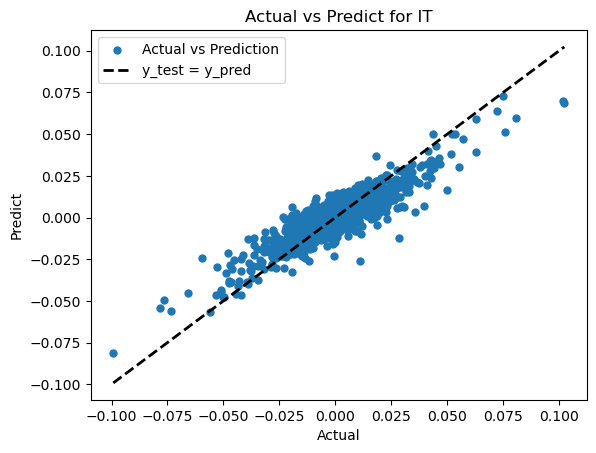

Empty DataFrame
Columns: []
Index: []
         MSE  R-squared
IT  0.000073   0.791964


In [6]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 결과를 저장할 데이터프레임 생성
beta_df = pd.DataFrame()
performance_df = pd.DataFrame(columns=['MSE', 'R-squared'])

# sector_return의 각 섹터별로 반복
for sector in sector_return.columns[1:]:  # 첫 번째 열(Name)을 제외한 나머지 섹터명
    if(sector == "IT"):
        # 종속 변수: 해당 섹터의 수익률
        y = sector_return[sector]

        # 독립 변수: premium 데이터 (HML, C MA, UMD, SMB, Rm-Rf)
        X = premium.iloc[:, 1:]  # 첫 번째 열(Code)을 제외한 나머지 값

        # 데이터 분할: 훈련 세트와 테스트 세트
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

        # SVR 모델 생성 및 학습
        svr = SVR(kernel='rbf'   , C=1, epsilon=0.01)  # 선형 커널 사용
        svr.fit(X_train, y_train)

        # 예측 및 성능 평가
        y_pred = svr.predict(X_test)
        
        predict_df = pd.DataFrame({'actual': y_test, 'predict': y_pred})
        custom_mse = ((predict_df['predict'] - predict_df['actual']) ** 2).mean()

        # 계수 및 성능 지표 저장
        #beta_df[sector] = svr.coef_[0]
        performance_df.loc[sector] = [custom_mse, svr.score(X_test, y_test)]

        # 산점도 그리기
        plt.scatter(y_test, y_pred, marker='.', label='Actual vs Prediction', s=100)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='y_test = y_pred')
        plt.xlabel("Actual")
        plt.ylabel("Predict")
        plt.title(f'Actual vs Predict for {sector}')
        plt.legend()
        plt.show()

# 결과 데이터프레임의 전치(transpose)를 취하여 형식을 맞춤
beta_df = beta_df.transpose()

# 결과 출력
print(beta_df)
print(performance_df)

In [7]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# 결과를 저장할 데이터프레임 생성
beta_df = pd.DataFrame()
performance_df = pd.DataFrame(columns=['MSE', 'R-squared'])

# 하이퍼파라미터 그리드 설정
param_grid = {
    'C': [0.1, 1, 10, 100], # 오차에 대한 페널티
    'epsilon': [0.0001, 0.001, 0.01, 0.1], # 마진의 폭
}

# sector_return의 IT 섹터에 대해서만 수행
if 'IT' in sector_return.columns:
    y = sector_return['IT']
    X = premium.iloc[:, 1:]  # 첫 번째 열(Code)을 제외한 나머지 값

    # 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # GridSearchCV를 사용하여 SVR 모델 생성 및 하이퍼파라미터 튜닝
    svr = SVR(kernel='linear')
    grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=0)
    grid_search.fit(X_train, y_train)

    # 최적의 모델 선택
    best_svr = grid_search.best_estimator_

    # 예측 및 성능 평가
    y_pred = best_svr.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r_squared = best_svr.score(X_test, y_test)

    # 계수 및 성능 지표 저장
    beta_df['IT'] = best_svr.coef_[0]
    performance_df.loc['IT'] = [mse, r_squared]

    # 산점도 그리기
    plt.scatter(y_test, y_pred, marker='.', label='Actual vs Prediction', s=100)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='y_test = y_pred')
    plt.xlabel("Actual")
    plt.ylabel("Predict")
    plt.title('Actual vs Predict for IT sector')
    plt.legend()
    plt.show()

# 결과 데이터프레임의 전치(transpose)를 취하여 형식을 맞춤
beta_df = beta_df.transpose()

# 결과 출력
print("Best Parameters:", grid_search.best_params_)
print(beta_df)
print(performance_df)


KeyboardInterrupt: 

In [8]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

# 결과를 저장할 데이터프레임 생성
beta_df = pd.DataFrame()
performance_df = pd.DataFrame(columns=['MSE', 'R-squared'])

# sector_return의 각 섹터별로 반복
for sector in sector_return.columns[1:]:  # 첫 번째 열(Name)을 제외한 나머지 섹터명
    if(sector == "IT"):
        # 종속 변수: 해당 섹터의 수익률
        y = sector_return[sector]

        # 독립 변수: premium 데이터 (HML, CMA, UMD, SMB, Rm-Rf)
        X = premium.iloc[:, 1:]  # 첫 번째 열(Code)을 제외한 나머지 값

        # 데이터 분할: 훈련 세트와 테스트 세트
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

        lr = sm.OLS(y_train,X_train).fit()

        # 예측 및 성능 평가
        y_pred = lr.predict(X_test)
        
        predict_df = pd.DataFrame({'actual': y_test, 'predict': y_pred})
        custom_mse = ((predict_df['predict'] - predict_df['actual']) ** 2).mean()

        # 계수 및 성능 지표 저장
        beta_df[sector] = svr.coef_[0]
        performance_df.loc[sector] = [custom_mse, svr.score(X_test, y_test)]

        # 산점도 그리기
        plt.scatter(y_test, y_pred, marker='.', label='Actual vs Prediction', s=100)
        plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='y_test = y_pred')
        plt.xlabel("Actual")
        plt.ylabel("Predict")
        plt.title(f'Actual vs Predict for {sector}')
        plt.legend()
        plt.show()

# 결과 데이터프레임의 전치(transpose)를 취하여 형식을 맞춤
beta_df = beta_df.transpose()

# 결과 출력
print(beta_df)
print(performance_df)


AttributeError: 'SVR' object has no attribute '_dual_coef_'

In [102]:
X

,HML,CMA,UMD,SMB,Rm-Rf
0,-0.041391,-0.010371,-0.037805,0.028943,-0.056097
1,-0.019918,0.009651,-0.027487,0.053325,-0.033296
2,0.010137,0.006339,0.007525,-0.013642,-0.026680
3,-0.004110,-0.013460,0.007272,-0.011671,0.035532
4,-0.009221,-0.004197,0.012245,0.006785,0.004786
...,...,...,...,...,...
5672,0.008130,0.000817,0.000673,-0.009641,-0.020703
5673,-0.002100,0.005953,0.001946,-0.007360,0.001930
5674,-0.003220,0.001029,-0.000858,0.000903,0.007762
5675,-0.013663,-0.016116,-0.007775,0.012979,-0.021637


c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50640 (\N{HANGUL SYLLABLE E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45320 (\N{HANGUL SYLLABLE NEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


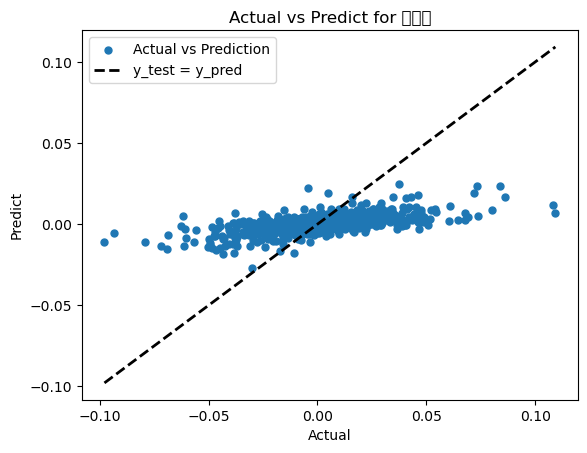

c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


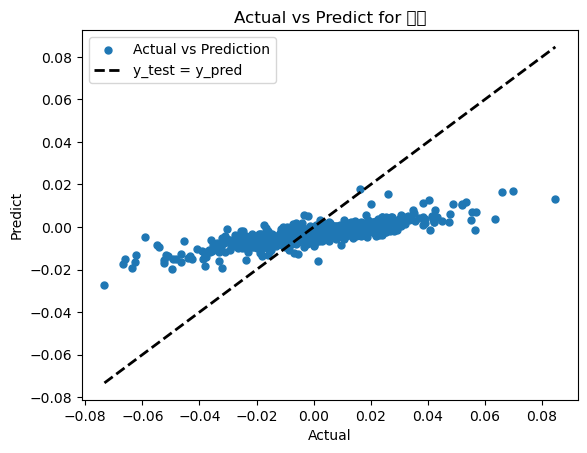

c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49328 (\N{HANGUL SYLLABLE SAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50629 (\N{HANGUL SYLLABLE EOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


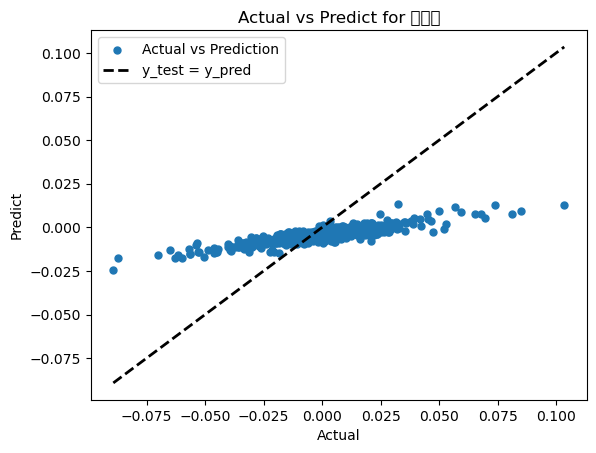

c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44592 (\N{HANGUL SYLLABLE GI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47144 (\N{HANGUL SYLLABLE RYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anacon

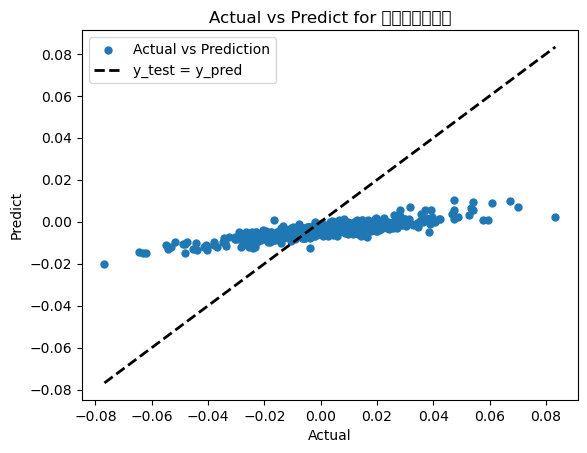

c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54596 (\N{HANGUL SYLLABLE PIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49548 (\N{HANGUL SYLLABLE SO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48708 (\N{HANGUL SYLLABLE BI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51116 (\N{HANGUL SYLLABLE JAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


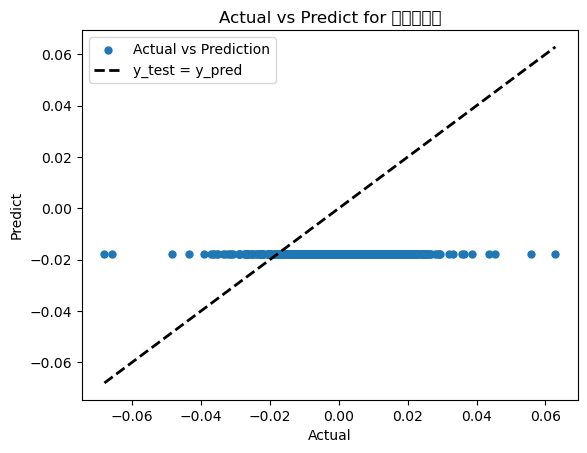

c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44148 (\N{HANGUL SYLLABLE GEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44053 (\N{HANGUL SYLLABLE GANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44288 (\N{HANGUL SYLLABLE GWAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


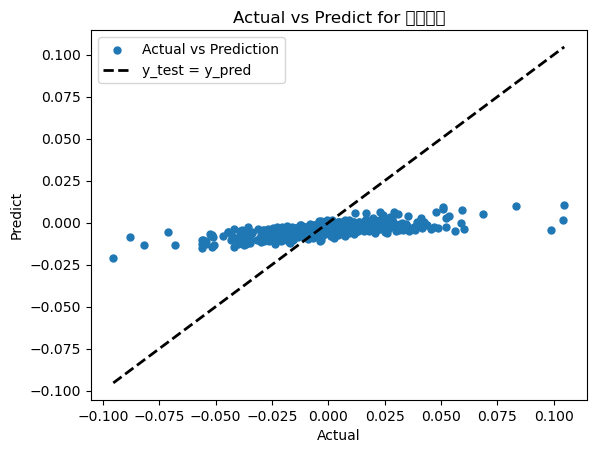

c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44552 (\N{HANGUL SYLLABLE GEUM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50997 (\N{HANGUL SYLLABLE YUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


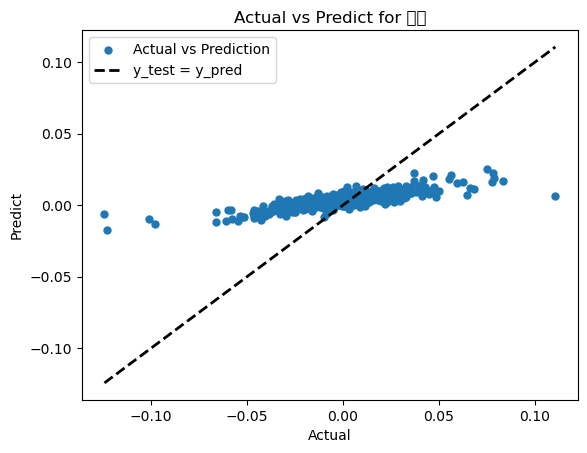

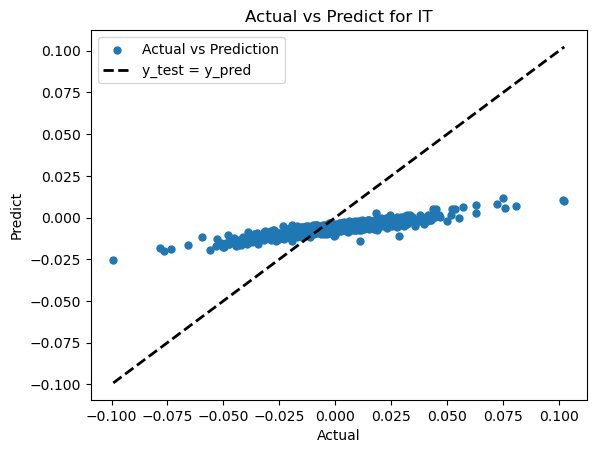

c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52964 (\N{HANGUL SYLLABLE KEO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48036 (\N{HANGUL SYLLABLE MYU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45768 (\N{HANGUL SYLLABLE NI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52992 (\N{HANGUL SYLLABLE KE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\

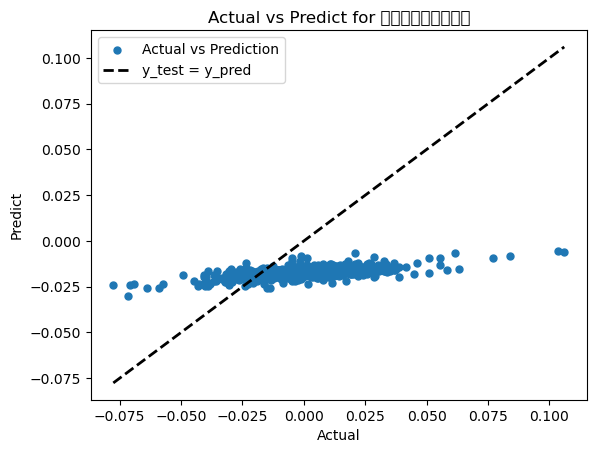

c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54008 (\N{HANGUL SYLLABLE TIL}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47532 (\N{HANGUL SYLLABLE RI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82107\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 54000 (\N{HANGUL SYLLABLE TI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


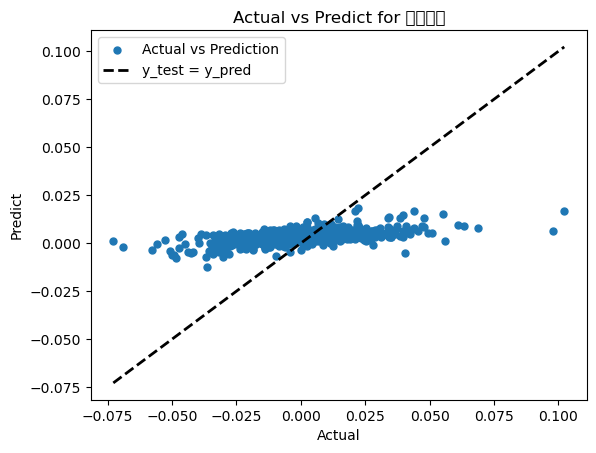

In [96]:
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split

# sector_return의 각 섹터별로 반복
for sector in sector_return.columns[1:]:  # 첫 번째 열(Name)을 제외한 나머지 섹터명
    if sector=
    # 종속 변수: 해당 섹터의 수익률
    y = sector_return[sector]

    # 독립 변수: premium 데이터 (HML, CMA, UMD, SMB, Rm-Rf)
    X = premium.iloc[:, 1:]  # 첫 번째 열(Code)을 제외한 나머지 값

    # 데이터 분할: 훈련 세트와 테스트 세트
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

    # SVR 모델 생성 및 학습
    svr = SVR(kernel='linear')
    svr.fit(X_train, y_train)

    # 예측
    y_pred = svr.predict(X_test)

    # 산점도 그리기
    plt.scatter(y_test, y_pred, marker='.', label='Actual vs Prediction', s=100)
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], 'k--', lw=2, label='y_test = y_pred')
    plt.xlabel("Actual")
    plt.ylabel("Predict")
    plt.title(f'Actual vs Predict for {sector}')
    plt.legend()
    plt.show()


In [ ]:
predict_df = pd.DataFrame({'actual':y_test,'predict':lr.predict(X_test)})
mse = ((predict_df['predict'] - predict_df['actual']) ** 2).mean()
print(mse)

이거는 IT섹터에만 따로 svr 돌린거에요

In [10]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
merged_df = pd.merge(IT_factor_exposure, sector, on="Name")

# Selecting independent (X) and dependent (y) variables
X = merged_df[["HML", "CMA", "UMD", "SMB", "Rm-Rf"]]
y = merged_df["IT"]

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and train the SVR model
svr = SVR(kernel='poly')
svr.fit(X_train, y_train)

# Predicting and evaluating the model
y_pred = svr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

mse, r2

(1.996626796180856, -0.0005167583293264055)

In [2]:
sector_return.iloc[:,1:] = sector_return.iloc[:,1:]*100
sector_return

NameError: name 'sector_return' is not defined

여기가 본격적으로 파마 멕베스 svr 돌리는겁니다!

In [9]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# 결과와 성능 지표를 저장할 데이터프레임 생성
coefficients_df = pd.DataFrame()
performance_df = pd.DataFrame(columns=['MSE', 'R-squared'])

for index, row in sector_return.iterrows():
    # 종속 변수: 수익률
    y = row[1:]  # 첫 번째 열(Name)을 제외한 나머지 값

    # 독립 변수: factor_exposure 값
    X = beta_df.iloc[:, :]  # 첫 번째 열(이름)을 제외한 나머지 값

    # SVR 모델 생성 및 학습
    svr = SVR(kernel='linear')  # 선형 커널 사용
    svr.fit(X, y)

    # 계수 저장
    coefficients_df[row['Name']] = svr.coef_[0]  # 첫 번째 행의 계수

    # 성능 지표 계산 및 저장
    y_pred = svr.predict(X)
    mse = mean_squared_error(y, y_pred)
    r_squared = svr.score(X, y)

    performance_df.loc[row['Name']] = [mse, r_squared]

# 결과 데이터프레임의 전치(transpose)를 취하여 형식을 맞춤
coefficients_df = coefficients_df.transpose()


ValueError: at least one array or dtype is required

In [81]:
performance_df.mean()

MSE          1.647224e-08
R-squared   -1.573805e-01
dtype: float64

coefficients_df가 람다값입니다

In [83]:
coefficients_df

,0,1,2,3,4
2000-01-05,0.0,0.0,0.0,0.0,0.0
2000-01-06,0.0,0.0,0.0,0.0,0.0
2000-01-07,0.0,0.0,0.0,0.0,0.0
2000-01-10,0.0,0.0,0.0,0.0,0.0
2000-01-11,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2022-12-23,0.0,0.0,0.0,0.0,0.0
2022-12-26,0.0,0.0,0.0,0.0,0.0
2022-12-27,0.0,0.0,0.0,0.0,0.0
2022-12-28,0.0,0.0,0.0,0.0,0.0


performance_df가 성능평가 지표입니다.!

In [34]:
performance_df

,MSE,R-squared
2000-01-31,0.000224,-0.199124
2000-02-29,0.000358,-0.086141
2000-03-31,0.000263,-0.020743
2000-04-28,0.000368,-0.095644
2000-05-31,0.001093,-0.007485
...,...,...
2022-08-31,0.000131,-0.351306
2022-09-30,0.000118,-0.038933
2022-10-31,0.000136,-0.061891
2022-11-30,0.000041,-0.094435


이 뒤에는 수익률 테스트를 해보기 위해서 2021년 이전 데이터로 학습시키고 2022년꺼는 예측 돌렸습니다.

In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error


# 결과와 성능 지표를 저장할 데이터프레임 생성
coefficients_df = pd.DataFrame()
performance_df = pd.DataFrame(columns=['MSE', 'R-squared'])

# 2022년 이후 데이터에 대한 예측을 저장할 데이터프레임 생성
predictions_df = pd.DataFrame()

# 2021년 이전 데이터를 훈련 데이터로 사용
train_data = sector[sector['Name'] <= '2021-12-31']
X_train = factor_exposure.iloc[:, 2:]  # 첫 번째 열(이름)과 상수항 열을 제외한 나머지 값

for index, row in sector.iterrows():
    # 종속 변수: 수익률
    y = row[1:]  # 첫 번째 열(Name)을 제외한 나머지 값

    # SVR 모델 생성 및 학습 (2021년 이전 데이터로만)
    if row['Name'] <= '2021-12-31':
        svr = SVR(kernel='linear')  # 선형 커널 사용
        svr.fit(X_train, y)

        # 계수 저장
        coefficients_df[row['Name']] = svr.coef_[0]  # 첫 번째 행의 계수

        # 성능 지표 계산 및 저장
        y_pred = svr.predict(X_train)
        mse = mean_squared_error(y, y_pred)
        r_squared = svr.score(X_train, y)
        performance_df.loc[row['Name']] = [mse, r_squared]

    # 2022년 이후 데이터에 대한 예측 수행
    elif row['Name'] > '2021-12-31':
        y_pred = svr.predict(factor_exposure2.iloc[:, 2:])
        predictions_df[row['Name']] = y_pred

# 결과 데이터프레임의 전치(transpose)
coefficients_df = coefficients_df.transpose()
predictions_df = predictions_df.transpose()

market_return3은 뭔가 market_return << 이거 말고 코스피로 한번 테스트해본다고 작성한건데 무시해도 좋아요

In [186]:
market_return3 = market_return.iloc[276:]
market_return3.iloc[0,1] = -10.56
market_return3.iloc[1,1] = +1.35
market_return3.iloc[2,1] = +2.17
market_return3.iloc[3,1] = -2.27
market_return3.iloc[4,1] = -0.34
market_return3.iloc[5,1] = -13.15
market_return3.iloc[6,1] = +5.1
market_return3.iloc[7,1] = +0.84
market_return3.iloc[8,1] = -12.81
market_return3.iloc[9,1] = +6.41
market_return3.iloc[10,1] = +7.80
market_return3.iloc[11,1] = -9.55
market_return3.index = market_return.iloc[276:].index
market_return3

,Name,0
276,2022-01-28,-10.56
277,2022-02-28,1.35
278,2022-03-31,2.17
279,2022-04-29,-2.27
280,2022-05-31,-0.34
281,2022-06-30,-13.15
282,2022-07-29,5.10
283,2022-08-31,0.84
284,2022-09-30,-12.81
285,2022-10-31,6.41


In [206]:
market_return.iloc[276:]

,0
Name,
2022-01-28,2.014160
2022-02-28,0.854318
2022-03-31,0.429935
2022-04-29,1.090568
2022-05-31,0.637578
2022-06-30,-1.957986
2022-07-29,0.668371
2022-08-31,0.925161
2022-09-30,-0.654633


각 시장 수익률 예측한 값입니다. 

In [217]:
# 시장 수익률을 저장할 Series 생성
market_return2 = pd.Series(index=predictions_df.index)

# 각 날짜별로 계산
for date in predictions_df.index:
    # 'Name' 열을 기준으로 해당 날짜의 sector 수익률을 선택
    sector_values = sector.set_index('Name').loc[date]

    # predictions_df에서 해당 날짜의 예측 계수를 선택
    prediction_values = predictions_df.loc[date]
    prediction_values.index = sector_values.index

    # 계수와 수익률을 곱하여 합산
    market_return2[date] = (sector_values * prediction_values).sum()

print(market_return2)


2022-01-28   -15.432001
2022-02-28    -8.410070
2022-03-31    -4.044038
2022-04-29    -2.175682
2022-05-31    -6.046918
2022-06-30     9.775918
2022-07-29    -6.947416
2022-08-31    -2.817484
2022-09-30     3.825541
2022-10-31    -4.186944
2022-11-30    -7.942883
2022-12-29    13.084486
dtype: float64


시장수익률 예측한 값이 -면 숏, +면 롱이라 생각해서 이걸로 투자한다면 얼마를 벌까? 라는 생각으로 수익률 돌려보았습니다.

In [220]:
#market_return.set_index('Name', inplace=True)
# 최종 수익률을 저장할 Series 생성
final_return = pd.Series(index=market_return2.index)

# 각 날짜별로 계산
for date in market_return2.index:
    # market_return2가 음수인 경우 -1을 곱함
    if market_return2[date] < 0:
        final_return[date] = market_return.loc[date][0] * -1
    # market_return2가 양수 또는 0인 경우 그대로 더함
    else:
        final_return[date] = market_return.loc[date][0]

print(final_return)


2022-01-28   -2.014160
2022-02-28   -0.854318
2022-03-31   -0.429935
2022-04-29   -1.090568
2022-05-31   -0.637578
2022-06-30   -1.957986
2022-07-29   -0.668371
2022-08-31   -0.925161
2022-09-30   -0.654633
2022-10-31   -1.111551
2022-11-30   -1.406767
2022-12-29   -1.923769
dtype: float64


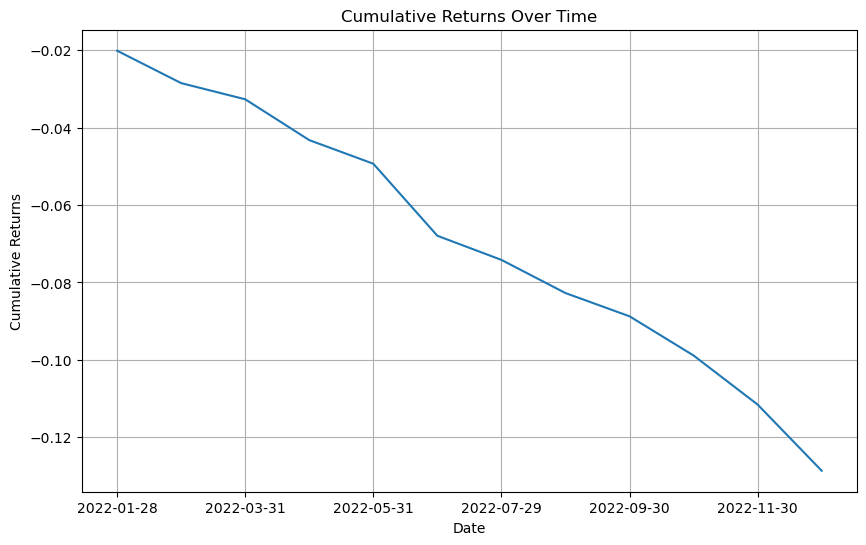

In [221]:
import matplotlib.pyplot as plt
cumulative_returns = (1 + final_return / 100).cumprod() - 1
# 차트 그리기
plt.figure(figsize=(10, 6))
cumulative_returns.plot()
plt.title("Cumulative Returns Over Time")
plt.xlabel("Date")
plt.ylabel("Cumulative Returns")
plt.grid(True)
plt.show()